In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import cross_val_score

In [20]:
df = pd.read_csv('E:\\ml_revision\\encoding_numerical_features\\datasets\\titanic_toy.csv')

In [21]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [22]:
df = df.dropna()

In [23]:
df.isnull().sum()

Age         0
Fare        0
Family      0
Survived    0
dtype: int64

In [24]:
x = df.iloc[:, :2]
y = df['Survived']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

###  Before KBinsDiscretizer

In [26]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
print("Accuraccy_socre : ", accuracy_score(y_test, y_pred))
print("cross_val_score : ", cross_val_score(dtc,x, y, cv = 5, scoring = 'accuracy').mean())

Accuraccy_socre :  0.6666666666666666
cross_val_score :  0.634074074074074


In [27]:
k_bin_age = KBinsDiscretizer(n_bins = 10, strategy='quantile', encode='ordinal')  
k_bin_fare = KBinsDiscretizer(n_bins = 10, strategy='quantile', encode='ordinal')

In [28]:
c_trans = ColumnTransformer(
    transformers=[
        ('age_trans', k_bin_age, [0]),
        ('fare_trans', k_bin_fare, [1])
    ]
)

### After kbinsdiscretizer

In [29]:
x_train_trf = c_trans.fit_transform(x_train)
x_test_trf = c_trans.fit_transform(x_test)

In [30]:
dtc2 = DecisionTreeClassifier()
dtc2.fit(x_train_trf, y_train)
y_pred2 = dtc2.predict(x_test_trf)
print("Accuraccy_socre : ", accuracy_score(y_test, y_pred2))
print("cross_val_score : ", cross_val_score(dtc2,x, y, cv = 5, scoring = 'accuracy').mean())

Accuraccy_socre :  0.6814814814814815
cross_val_score :  0.6296296296296297


In [47]:
def binning (bins, strategy):
    k_bin_trans_age = KBinsDiscretizer(n_bins= bins, strategy=strategy, encode='ordinal')
    k_bin_trans_fare = KBinsDiscretizer(n_bins= bins, strategy=strategy, encode='ordinal')

    c_transformaiton = ColumnTransformer(
        [
            ('k_bin_trans_age', k_bin_trans_age, [0]),
            ('k_bin_trans_fare', k_bin_trans_fare, [1])
        ]
    )

    x_train_modified = c_transformaiton.fit_transform(x_train)
    x_test_modified = c_transformaiton.transform(x_test)

    dtc3 = DecisionTreeClassifier()
    dtc3.fit(x_train_modified, y_train)
    y_pred3 = dtc3.predict(x_test_modified)
    print("Accuraccy_socre : ", accuracy_score(y_test, y_pred3))
    print("cross_val_score : ", cross_val_score(dtc3,x, y, cv = 5, scoring = 'accuracy').mean())

    plt.figure(figsize=(14,7))
    plt.subplot(2,2,1)
    sns.histplot(x_train['Age'],color='green',kde=True)
    plt.title("Age Before")

    plt.subplot(2,2,2)
    sns.histplot(x_train_modified[:,0],color='green',kde=True)
    plt.title("Age After")

    plt.subplot(2,2,3)
    sns.histplot(x_train['Fare'],color='red',kde=True)
    plt.title("Fare before")

    plt.subplot(2,2,4)
    sns.histplot(x_train_modified[:,1],color='red',kde=True)
    plt.title("Fare After")    

    plt.tight_layout()
    plt.show()     

Accuraccy_socre :  0.7037037037037037
cross_val_score :  0.6207407407407407


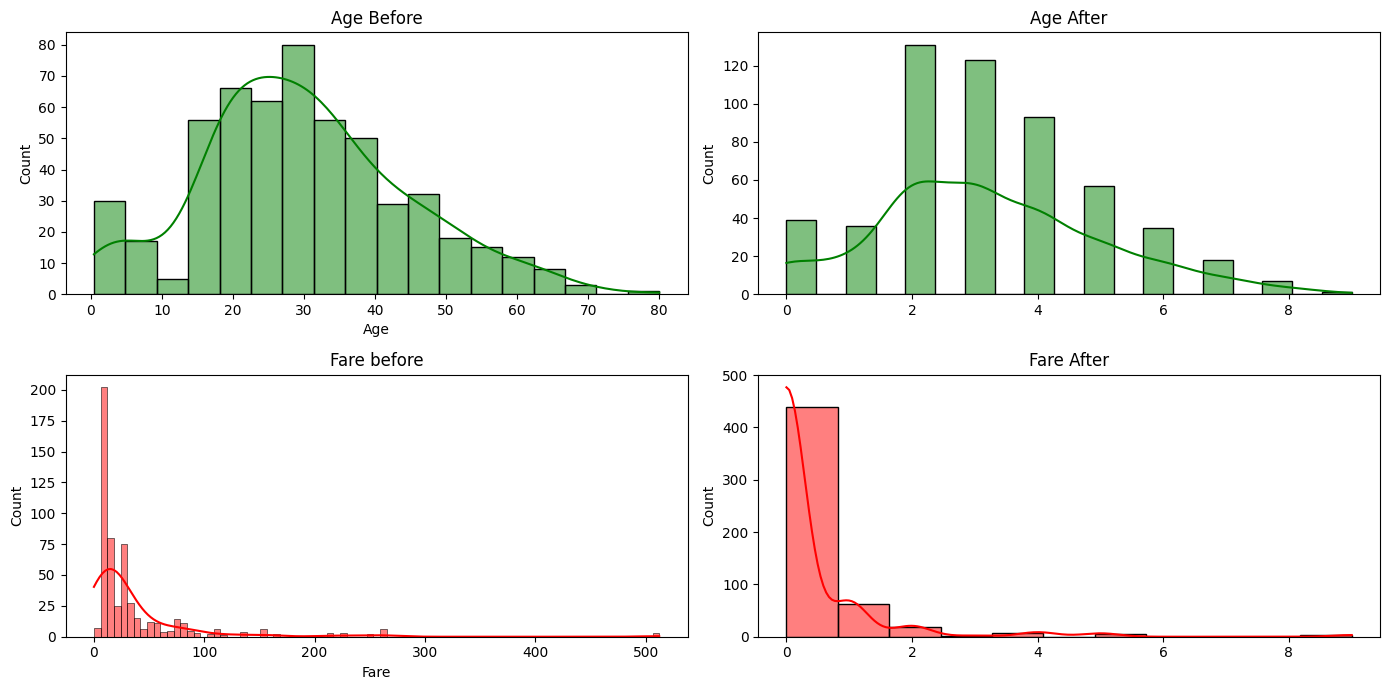

In [49]:
binning(10, 'uniform')